In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [3]:
#Loading the dataset
df = pd.read_csv("D:\Jupyter\Downloads\ibm-hr-analytics-employee-attrition-performance\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
#Checkking for missing data in the dataset
missing_data = df.isnull().sum()

#Getting basic statistics of the dataset
dataset_statistics = df.describe(include='all')
missing_data, dataset_statistics

(Age                         0
 Attrition                   0
 BusinessTravel              0
 DailyRate                   0
 Department                  0
 DistanceFromHome            0
 Education                   0
 EducationField              0
 EmployeeCount               0
 EmployeeNumber              0
 EnvironmentSatisfaction     0
 Gender                      0
 HourlyRate                  0
 JobInvolvement              0
 JobLevel                    0
 JobRole                     0
 JobSatisfaction             0
 MaritalStatus               0
 MonthlyIncome               0
 MonthlyRate                 0
 NumCompaniesWorked          0
 Over18                      0
 OverTime                    0
 PercentSalaryHike           0
 PerformanceRating           0
 RelationshipSatisfaction    0
 StandardHours               0
 StockOptionLevel            0
 TotalWorkingYears           0
 TrainingTimesLastYear       0
 WorkLifeBalance             0
 YearsAtCompany              0
 YearsIn

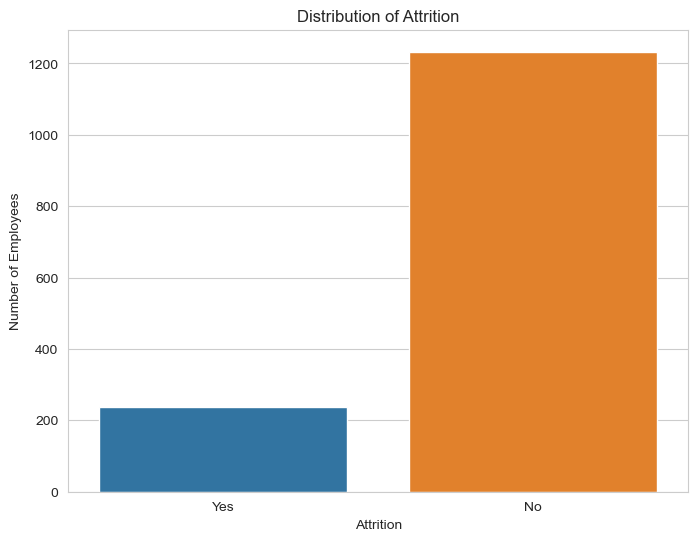

In [5]:
sns.set_style("whitegrid")

#Plotting the distribution of the Attrition column
plt.figure(figsize=(8, 6))
sns.countplot(x='Attrition', data=df)
plt.title('Distribution of Attrition')
plt.ylabel('Number of Employees')
plt.xlabel('Attrition')
plt.show()

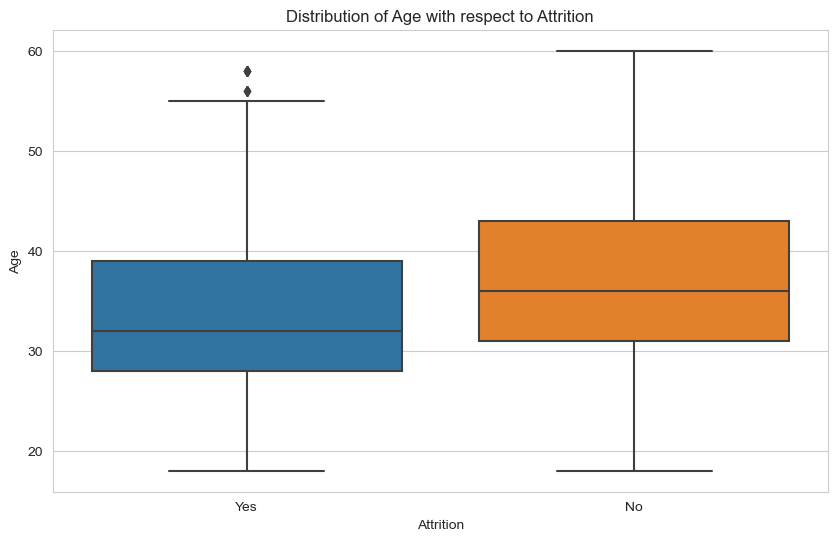

In [7]:
#Plotting the distribution of Age using a box plot with respect to Attrition
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Attrition", y="Age")
plt.title('Distribution of Age with respect to Attrition')
plt.ylabel('Age')
plt.xlabel('Attrition')
plt.show()

The median age of employees who left the company is slightly lower than those who stayed.
The employees who left the company are from a younger age range, as indicated by the lower quartile and upper quartile values.
Also, there are a few older employees which are marked as outliers in the attrition group, suggesting that while attrition is more common among younger employees, there are occasional departures among senior employees as well.

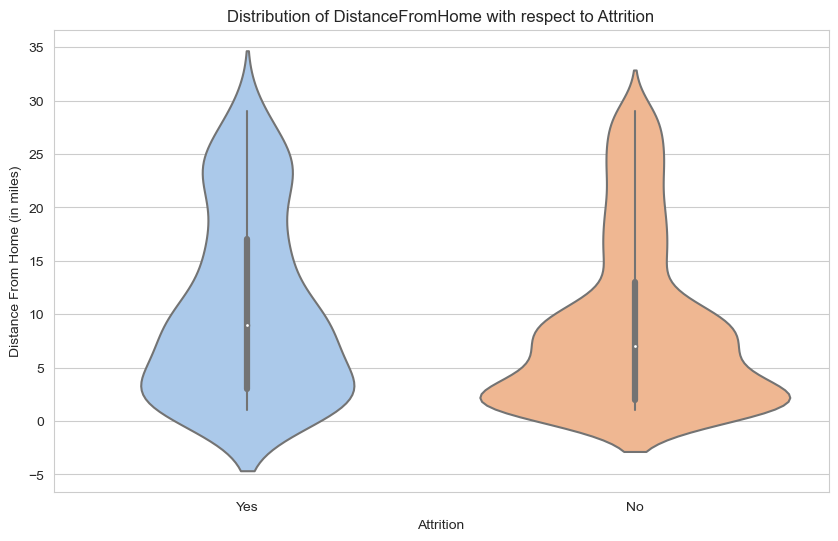

In [8]:
#Plotting the distribution of DistanceFromHome using a violin plot with respect to Attrition
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x="Attrition", y="DistanceFromHome", palette="pastel")
plt.title('Distribution of DistanceFromHome with respect to Attrition')
plt.ylabel('Distance From Home (in miles)')
plt.xlabel('Attrition')
plt.show()

For both groups (those who left and those who stayed), there are peaks at shorter distances from home, indicating that a significant number of employees live close to the workplace.
The employees who left the company seem to have a slightly broader distribution, suggesting a more varied distance from home.
The median distance from home for employees who left is slightly higher than for those who stayed.

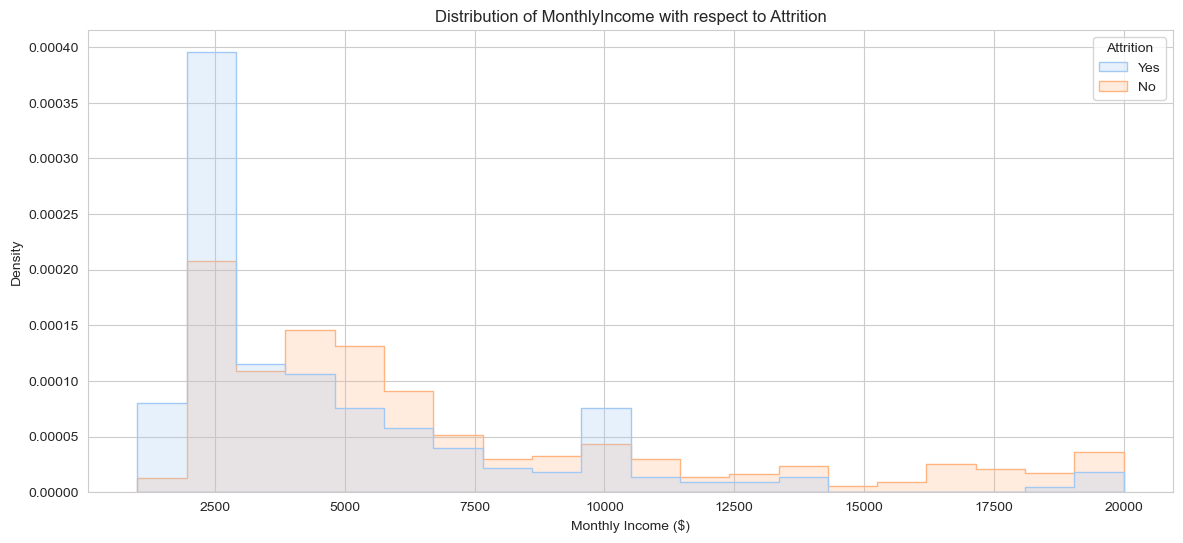

In [26]:
#Plotting the distribution of MonthlyIncome with respect to Attrition
plt.figure(figsize=(14, 6))
sns.histplot(data=df, x="MonthlyIncome", hue="Attrition", element="step", stat="density", common_norm=False, palette="pastel")
plt.title('Distribution of MonthlyIncome with respect to Attrition')
plt.ylabel('Density')
plt.xlabel('Monthly Income ($)')
plt.show()

Employees with a lower monthly income (particularly those earning below approximately $5000) seem to have a higher attrition rate.
As the monthly income increases, the attrition rate tends to decrease. Employees with higher incomes are less likely to leave the company, possibly because they are in more senior roles or are more satisfied with their compensation.
There are a few spikes in attrition at specific income levels, but the general trend suggests that higher income correlates with lower attrition.

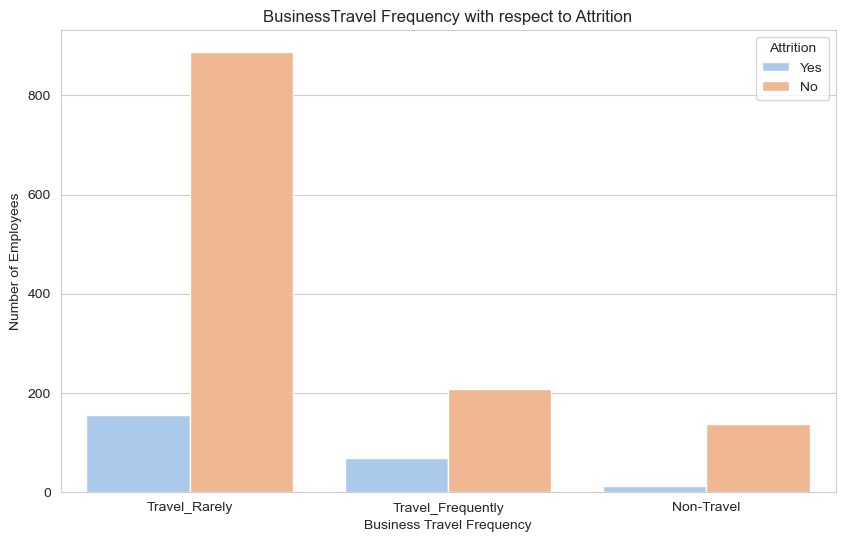

In [27]:
#Plotting the distribution of BusinessTravel frequency with respect to Attrition
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="BusinessTravel", hue="Attrition", palette="pastel")
plt.title('BusinessTravel Frequency with respect to Attrition')
plt.ylabel('Number of Employees')
plt.xlabel('Business Travel Frequency')
plt.show()

Employees who travel rarely for business have the highest count, but their attrition rate, in proportion to their count, seems to be lower than the other categories.
The attrition rate for employees who travel frequently appears to be higher when considering their total count. This suggests that frequent business travel might be a factor contributing to employee turnover.
Employees who don't travel at all (or travel non-frequently) have the lowest attrition rate in comparison

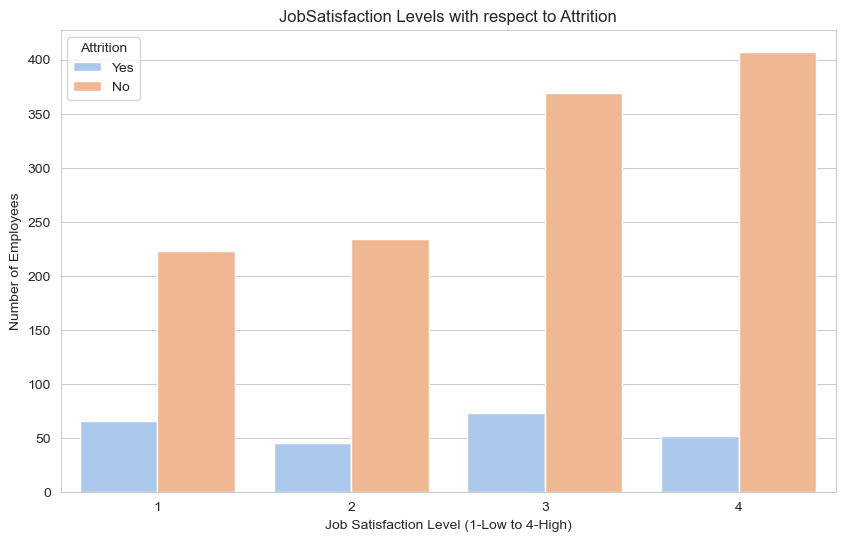

In [28]:
#Plotting the distribution of JobSatisfaction levels with respect to Attrition
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="JobSatisfaction", hue="Attrition", palette="pastel")
plt.title('JobSatisfaction Levels with respect to Attrition')
plt.ylabel('Number of Employees')
plt.xlabel('Job Satisfaction Level (1-Low to 4-High)')
plt.show()

Employees with the lowest job satisfaction (Level 1) have a noticeable attrition rate.
As job satisfaction increases (Levels 2 to 4), the number of departures decreases. This indicates that higher job satisfaction correlates with lower attrition, as one might expect.
However, it's worth noting that even among employees with the highest job satisfaction (Level 4), there are still some departures. This suggests that while job satisfaction is a significant factor, other factors also influence an employee's decision to leave

In [9]:
#Converting Attrition from string to numerical (Yes: 1, No: 0)
label_encoder = LabelEncoder()
df['Attrition'] = label_encoder.fit_transform(df['Attrition'])
df_encoded = pd.get_dummies(df, drop_first=True)

#Splitting the data into features and target variable
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

#Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Scaling the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape

((1176, 47), (294, 47))

In [10]:
#Initializing the Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)

#Training the model
lr_model.fit(X_train, y_train)

#Predicting on the testing set
y_pred = lr_model.predict(X_test)

#Evaluating the model
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

roc_auc, conf_matrix

(0.6499698509776898,
 array([[237,  10],
        [ 31,  16]], dtype=int64))

As per the above array:
True Negatives(TN)= 237,
False Positives(FP)= 10,
False Negatives(FN)= 31,
True Positives(TP)= 16